In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
import pickle
with open("100k_sample.pkl", 'rb') as picklefile: 
     df = pickle.load(picklefile)

In [3]:
df.head()

,tripduration,starttime,stoptime,startstationid,startstationname,startstationlat,startstationlong,endstationid,endstationname,endstationlat,endstationlong,bikeid,usertype,birthyear,gender,target,birthgiven,hour
id,,,,,,,,,,,,,,,,,,
4396439,699,2017-05-17 18:53:16,2017-05-17 19:04:55,293,Lafayette St & E 8 St,40.730207,-73.991026,518,E 39 St & 2 Ave,40.747804,-73.973442,20368,Subscriber,1991.0,1,0,0,18
15219352,265,2017-11-25 11:51:31,2017-11-25 11:55:56,3417,Baltic St & 5 Ave,40.679577,-73.978550,3371,4 Ave & 2 St,40.674613,-73.985011,29696,Subscriber,1981.0,2,0,0,11
11040726,1293,2017-09-12 18:10:10,2017-09-12 18:31:44,3067,Broadway & Whipple St,40.701666,-73.943730,3112,Milton St & Franklin St,40.729060,-73.957790,27412,Customer,1981.0,0,1,0,18
11629483,1304,2017-09-21 16:51:06,2017-09-21 17:12:51,444,Broadway & W 24 St,40.742354,-73.989151,448,W 37 St & 10 Ave,40.756604,-73.997901,21713,Subscriber,1997.0,2,0,0,16
7713985,1669,2017-07-17 20:12:37,2017-07-17 20:40:26,3260,Mercer St & Bleecker St,40.727064,-73.996621,508,W 46 St & 11 Ave,40.763414,-73.996674,26147,Subscriber,1984.0,2,0,0,20


In [4]:
#drop rows with no usertype information
df.dropna(axis='index', subset=['usertype'], inplace=True)

#strip spaces in 'usertype'
df['usertype']=[x.strip() for x in df['usertype']]

#turn target categories into numbers: subscriber=0, customer=1
usermap={'Subscriber':0,'Customer':1}
df['target']=df.loc[:,'usertype'].map(usermap)

In [5]:
sums=df.groupby(df['usertype']).size()

In [6]:
classes=sums.index
counts=sums.values

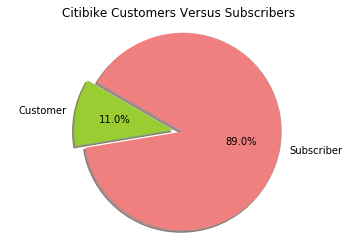

In [7]:
# Pie features
labels = classes
sizes = counts
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Pie
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal') 
plt.title("Citibike Customers Versus Subscribers")
plt.show()

In [14]:
# create column indicating the hour in which the trip started
df['hour']=[x.hour for x in df['starttime']]

Text(0.5,0,'Hour of Day (2400)')

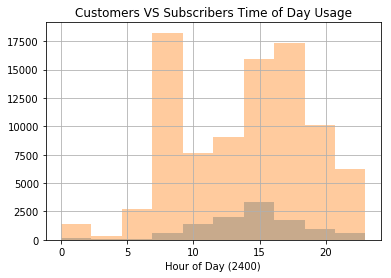

In [15]:
df.groupby("usertype").hour.hist(alpha=0.4)
plt.title("Customers VS Subscribers Time of Day Usage")
plt.xlabel("Hour of Day (2400)")

Text(0.5,0,' ')

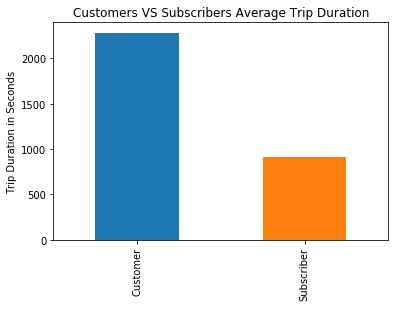

In [16]:
df.groupby("usertype").tripduration.mean().plot(kind='bar')
plt.title("Customers VS Subscribers Average Trip Duration")
plt.ylabel("Trip Duration in Seconds")
plt.xlabel(" ")

In [42]:
df=pd.read_csv("cleaned.csv")
df=df.set_index(df['id'], drop=True)

In [44]:
df=df.drop(columns=['id'])
df.head()

,tripduration,startstationid,endstationid,gender,target,hour,startboro,starthood,endboro,endhood
id,,,,,,,,,,
4396439,699,293,518,1,0,18,brooklyn,bedstuy,manhattan,uptown
15219352,265,3417,3371,2,0,11,0,0,0,0
11040726,1293,3067,3112,0,1,18,0,0,0,0
11629483,1304,444,448,2,0,16,manhattan,midtown,manhattan,village
7713985,1669,3260,508,2,0,20,0,0,manhattan,uptown


In [59]:
X=df[['tripduration', 'hour', 'startstationid', 'endstationid']]
y=df[['target']]


#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)

In [60]:
rf = RandomForestClassifier(class_weight='balanced')
gauss = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=18)
dtree = DecisionTreeClassifier(class_weight="balanced")
logm = LogisticRegression(class_weight="balanced")

In [61]:
print("Random Forest score: " + str(np.mean(cross_val_score(rf, X_train, y_train.values.ravel(), scoring='f1'))))
print("Gaussian Naive Bayes score: " + str(np.mean(cross_val_score(gauss, X_train, y_train.values.ravel(), scoring='f1'))))
print("KNN score: " + str(np.mean(cross_val_score(knn, X_train, y_train.values.ravel(), scoring='f1'))))
print("Decision Tree Classifier score: " + str(np.mean(cross_val_score(dtree, X_train, y_train.values.ravel(), scoring='f1'))))
print("Logistic Regression score: " + str(np.mean(cross_val_score(logm, X_train, y_train.values.ravel(), scoring='f1'))))

Random Forest score: 0.2574912761033354
Gaussian Naive Bayes score: 0.008133716880998842
KNN score: 0.16995249158626957
Decision Tree Classifier score: 0.29842155405933785
Logistic Regression score: 0.36461003587475793


In [48]:
# Given range 1-20, ideal=18. Given rage 1-30, ideal=29
k_range = list(range(1, 30))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    y_pred=knn.predict(X_test)
    k_scores.append(metrics.accuracy_score(y_test, y_pred))
print(k_scores.index(max(k_scores))+1)

28


In [49]:
gbm = xgb.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="binary:logistic",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=50,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-rmse:0.467493	validation_1-rmse:0.467587
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.43975	validation_1-rmse:0.439944
[2]	validation_0-rmse:0.417207	validation_1-rmse:0.417414
[3]	validation_0-rmse:0.39664	validation_1-rmse:0.397004
[4]	validation_0-rmse:0.378743	validation_1-rmse:0.379238
[5]	validation_0-rmse:0.363573	validation_1-rmse:0.364167
[6]	validation_0-rmse:0.350932	validation_1-rmse:0.351654
[7]	validation_0-rmse:0.341081	validation_1-rmse:0.341824
[8]	validation_0-rmse:0.331784	validation_1-rmse:0.332632
[9]	validation_0-rmse:0.324025	validation_1-rmse:0.324944
[10]	validation_0-rmse:0.31746	validation_1-rmse:0.318473
[11]	validation_0-rmse:0.312757	validation_1-rmse:0.313784
[12]	validation_0-rmse:0.308135	validation_1-rmse:0.30922
[13]	validation_0-rmse:0.304327	validation_1-rmse:0.305529
[14]	validation_0-rmse:0.3011

[137]	validation_0-rmse:0.27649	validation_1-rmse:0.280183
[138]	validation_0-rmse:0.276433	validation_1-rmse:0.280147
[139]	validation_0-rmse:0.276412	validation_1-rmse:0.280128
[140]	validation_0-rmse:0.276403	validation_1-rmse:0.280114
[141]	validation_0-rmse:0.276371	validation_1-rmse:0.280111
[142]	validation_0-rmse:0.276357	validation_1-rmse:0.280102
[143]	validation_0-rmse:0.27623	validation_1-rmse:0.279989
[144]	validation_0-rmse:0.276095	validation_1-rmse:0.279855
[145]	validation_0-rmse:0.276009	validation_1-rmse:0.279802
[146]	validation_0-rmse:0.275978	validation_1-rmse:0.279804
[147]	validation_0-rmse:0.275889	validation_1-rmse:0.279741
[148]	validation_0-rmse:0.275838	validation_1-rmse:0.279687
[149]	validation_0-rmse:0.275818	validation_1-rmse:0.2797
[150]	validation_0-rmse:0.275802	validation_1-rmse:0.279691
[151]	validation_0-rmse:0.275737	validation_1-rmse:0.279683
[152]	validation_0-rmse:0.275624	validation_1-rmse:0.279595
[153]	validation_0-rmse:0.27555	validation_1

[275]	validation_0-rmse:0.271109	validation_1-rmse:0.276482
[276]	validation_0-rmse:0.271091	validation_1-rmse:0.276481
[277]	validation_0-rmse:0.271076	validation_1-rmse:0.276482
[278]	validation_0-rmse:0.271031	validation_1-rmse:0.276458
[279]	validation_0-rmse:0.270983	validation_1-rmse:0.276427
[280]	validation_0-rmse:0.270909	validation_1-rmse:0.27633
[281]	validation_0-rmse:0.270897	validation_1-rmse:0.276325
[282]	validation_0-rmse:0.270893	validation_1-rmse:0.27633
[283]	validation_0-rmse:0.270889	validation_1-rmse:0.276329
[284]	validation_0-rmse:0.27087	validation_1-rmse:0.276319
[285]	validation_0-rmse:0.270826	validation_1-rmse:0.276284
[286]	validation_0-rmse:0.270819	validation_1-rmse:0.276281
[287]	validation_0-rmse:0.270801	validation_1-rmse:0.276265
[288]	validation_0-rmse:0.27079	validation_1-rmse:0.276271
[289]	validation_0-rmse:0.270761	validation_1-rmse:0.276259
[290]	validation_0-rmse:0.270754	validation_1-rmse:0.276259
[291]	validation_0-rmse:0.270728	validation_

[412]	validation_0-rmse:0.267767	validation_1-rmse:0.274631
[413]	validation_0-rmse:0.267731	validation_1-rmse:0.274641
[414]	validation_0-rmse:0.267705	validation_1-rmse:0.274623
[415]	validation_0-rmse:0.267656	validation_1-rmse:0.274582
[416]	validation_0-rmse:0.267627	validation_1-rmse:0.274586
[417]	validation_0-rmse:0.267599	validation_1-rmse:0.274567
[418]	validation_0-rmse:0.26758	validation_1-rmse:0.274567
[419]	validation_0-rmse:0.267547	validation_1-rmse:0.274513
[420]	validation_0-rmse:0.267511	validation_1-rmse:0.274485
[421]	validation_0-rmse:0.267508	validation_1-rmse:0.274485
[422]	validation_0-rmse:0.267501	validation_1-rmse:0.274488
[423]	validation_0-rmse:0.267491	validation_1-rmse:0.274493
[424]	validation_0-rmse:0.26748	validation_1-rmse:0.274493
[425]	validation_0-rmse:0.26746	validation_1-rmse:0.27449
[426]	validation_0-rmse:0.267442	validation_1-rmse:0.274483
[427]	validation_0-rmse:0.267428	validation_1-rmse:0.274477
[428]	validation_0-rmse:0.267406	validation_

[549]	validation_0-rmse:0.265171	validation_1-rmse:0.273721
[550]	validation_0-rmse:0.265151	validation_1-rmse:0.2737
[551]	validation_0-rmse:0.265128	validation_1-rmse:0.273712
[552]	validation_0-rmse:0.265104	validation_1-rmse:0.27369
[553]	validation_0-rmse:0.265092	validation_1-rmse:0.273681
[554]	validation_0-rmse:0.265088	validation_1-rmse:0.273685
[555]	validation_0-rmse:0.265078	validation_1-rmse:0.273694
[556]	validation_0-rmse:0.265073	validation_1-rmse:0.273699
[557]	validation_0-rmse:0.265055	validation_1-rmse:0.273683
[558]	validation_0-rmse:0.265048	validation_1-rmse:0.273696
[559]	validation_0-rmse:0.26504	validation_1-rmse:0.273693
[560]	validation_0-rmse:0.265028	validation_1-rmse:0.273697
[561]	validation_0-rmse:0.265022	validation_1-rmse:0.273693
[562]	validation_0-rmse:0.265008	validation_1-rmse:0.273693
[563]	validation_0-rmse:0.264986	validation_1-rmse:0.273689
[564]	validation_0-rmse:0.264965	validation_1-rmse:0.273686
[565]	validation_0-rmse:0.264928	validation_

[687]	validation_0-rmse:0.263134	validation_1-rmse:0.273176
[688]	validation_0-rmse:0.263121	validation_1-rmse:0.273189
[689]	validation_0-rmse:0.263091	validation_1-rmse:0.273151
[690]	validation_0-rmse:0.263077	validation_1-rmse:0.273151
[691]	validation_0-rmse:0.263065	validation_1-rmse:0.273147
[692]	validation_0-rmse:0.263064	validation_1-rmse:0.273148
[693]	validation_0-rmse:0.263042	validation_1-rmse:0.273152
[694]	validation_0-rmse:0.263029	validation_1-rmse:0.273146
[695]	validation_0-rmse:0.262991	validation_1-rmse:0.273122
[696]	validation_0-rmse:0.262989	validation_1-rmse:0.273128
[697]	validation_0-rmse:0.262983	validation_1-rmse:0.273133
[698]	validation_0-rmse:0.262957	validation_1-rmse:0.273111
[699]	validation_0-rmse:0.262929	validation_1-rmse:0.273087
[700]	validation_0-rmse:0.262907	validation_1-rmse:0.273083
[701]	validation_0-rmse:0.262885	validation_1-rmse:0.27307
[702]	validation_0-rmse:0.262874	validation_1-rmse:0.27307
[703]	validation_0-rmse:0.262867	validatio

[824]	validation_0-rmse:0.261057	validation_1-rmse:0.272709
[825]	validation_0-rmse:0.261041	validation_1-rmse:0.272704
[826]	validation_0-rmse:0.261034	validation_1-rmse:0.272704
[827]	validation_0-rmse:0.261033	validation_1-rmse:0.272706
[828]	validation_0-rmse:0.261021	validation_1-rmse:0.272691
[829]	validation_0-rmse:0.261015	validation_1-rmse:0.272693
[830]	validation_0-rmse:0.261002	validation_1-rmse:0.272684
[831]	validation_0-rmse:0.260992	validation_1-rmse:0.272683
[832]	validation_0-rmse:0.260987	validation_1-rmse:0.272681
[833]	validation_0-rmse:0.260979	validation_1-rmse:0.272682
[834]	validation_0-rmse:0.260958	validation_1-rmse:0.272688
[835]	validation_0-rmse:0.260953	validation_1-rmse:0.27269
[836]	validation_0-rmse:0.260924	validation_1-rmse:0.27268
[837]	validation_0-rmse:0.260906	validation_1-rmse:0.272678
[838]	validation_0-rmse:0.260889	validation_1-rmse:0.272683
[839]	validation_0-rmse:0.26088	validation_1-rmse:0.272688
[840]	validation_0-rmse:0.260874	validation

[962]	validation_0-rmse:0.259249	validation_1-rmse:0.272493
[963]	validation_0-rmse:0.259236	validation_1-rmse:0.272482
[964]	validation_0-rmse:0.259228	validation_1-rmse:0.272485
[965]	validation_0-rmse:0.2592	validation_1-rmse:0.272473
[966]	validation_0-rmse:0.259189	validation_1-rmse:0.272483
[967]	validation_0-rmse:0.259188	validation_1-rmse:0.272485
[968]	validation_0-rmse:0.259176	validation_1-rmse:0.272479
[969]	validation_0-rmse:0.259175	validation_1-rmse:0.272482
[970]	validation_0-rmse:0.259169	validation_1-rmse:0.272484
[971]	validation_0-rmse:0.25915	validation_1-rmse:0.272485
[972]	validation_0-rmse:0.259138	validation_1-rmse:0.272481
[973]	validation_0-rmse:0.259122	validation_1-rmse:0.272479
[974]	validation_0-rmse:0.259105	validation_1-rmse:0.272475
[975]	validation_0-rmse:0.259094	validation_1-rmse:0.272482
[976]	validation_0-rmse:0.259068	validation_1-rmse:0.272484
[977]	validation_0-rmse:0.25906	validation_1-rmse:0.272489
[978]	validation_0-rmse:0.259044	validation_

In [50]:
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

rmse(gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit),y_val.values.ravel()) 

0.2724309175216834

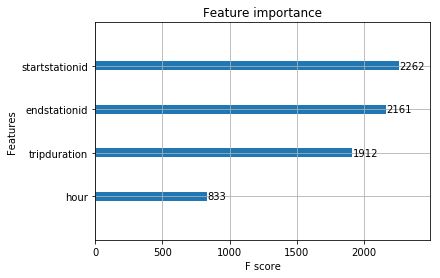

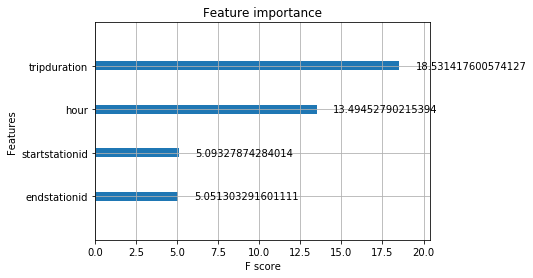

In [51]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')